<a href="https://colab.research.google.com/github/ericwarren9/ST-590/blob/main/Warren_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 590 Homework 5 By: Eric Warren

## Part I: Concept Questions

Question: We discussed the “Five V’s of Big Data”. Give an example of a place where you’ve encountered big data or a topic you are interested in where big data would arise. Specifically address the five V’s for the example and whether/how they apply to your example.

Answer: In my previous internship with a large healthcare company, we had large amounts of streaming data we had to deal with. With a company that large and deals with so many people the **volume** of the data was quite large (which ended up being over 330 million different observations which was just looking at a 2.5 year window). With large amounts of patient data that took place on many continents, it is easy to see how the size (or **volume**) of the data can quickly stack up. The **velocity** of the data was constantly tested when using modeling techniques and other ways to analyze and read this in. Tools like Spark were used to get the data from its database in raw formats and have to quickly turn it into a readable format that could be used. Then on top of that, we had to deal with the different **variety** of data that took place. Many formats of the data were differently stored in the databases that we had to pull from so we had to find a way to turn it into a readable and easily analyzed dataframe or document. Healthcare companies which generate over $56 billion of revenue find much **value** from this data. It can make decisions on what its constituents want or need and know how to tailor their plans to keep growing (and retaining) their customer base while continuing to make a large profit. This data gives them valuable insights on what decisions to make. Lastly, there is a lot of **veracity (or variability)** in this data as there may be missing values or even extreme cases within the types of people you might have to look at. Was the data collected correctly? Are there differences in geographic location? These are things that might cause these uncertainties in our data and something we have to account for.

We looked at using simulation to investigate the sampling distribution of $\hat{p}$ in the notes. We'll now look at the sampling distribution of the sample slope from an SLR model using simulation.

- Recall we assume the following model for SLR:
$$Y_i = \beta_0 + \beta_1 x_i + E_i$$
where the $E_i$ are assumed to be indendent and identically distributed from a Normal distribution with mean 0 and variance $\sigma^2$. Let’s assume $\sigma^2$ = 1 for simplicity.
- We can generate data from this model by assuming values for $\beta_0, \beta_1$, and n, along with a sequence of x values via the following code:

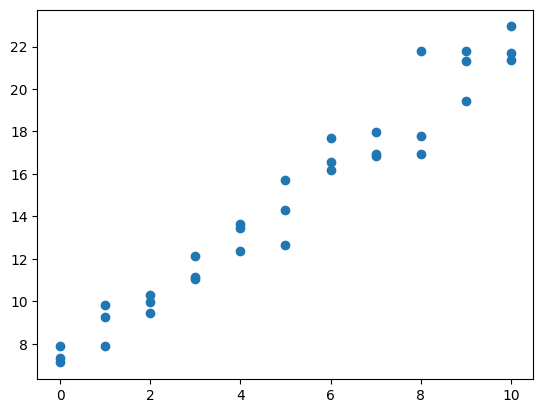

In [1]:
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

# Make random data
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5

# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33

#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)

#visualize the data
plt.scatter(x = x, y = y)
plt.show()

- Now we can use sklearn to obtain the estimate for the slope (and save that value) as we did earlier in the course.
- Repeat the above process 5000 times (generating the y values, finding the "best" slope, and saving that slope). We can use the many values of the sample slope as an approximation to the sampling distribution of the sample slope!

In [2]:
# Import linear regression function and pandas and flatten list with itertools
from itertools import chain
import pandas as pd
from sklearn import linear_model

# Create for loop to get slope
slope_lst = []
for i in range(5000):
  # Make random data
  rng = default_rng()
  beta_0 = 7
  beta_1 = 1.5

  # get three 'values' of x at each integer from 0 to 10.
  x = np.array(list(np.linspace(start = 0, stop = 10, num = 11)) * 3)
  n = 33

  #create the 'responses' modeled from the line plus a random deviation
  y = beta_0 + beta_1*x + rng.standard_normal(n)

  # Now find the best slope
  reg = linear_model.LinearRegression() #Create a reg object
  reg.fit(x.reshape(-1,1), y)

  # Make list for slope values
  slope_lst.append(reg.coef_)

# Show first couple of list items to show it worked
slopes = pd.Series(list(chain(*slope_lst)))
slopes[:5]


0    1.561414
1    1.371573
2    1.504652
3    1.429979
4    1.512119
dtype: float64

Now, create a histogram of the sample slope values you found.

Text(0, 0.5, 'Frequency')

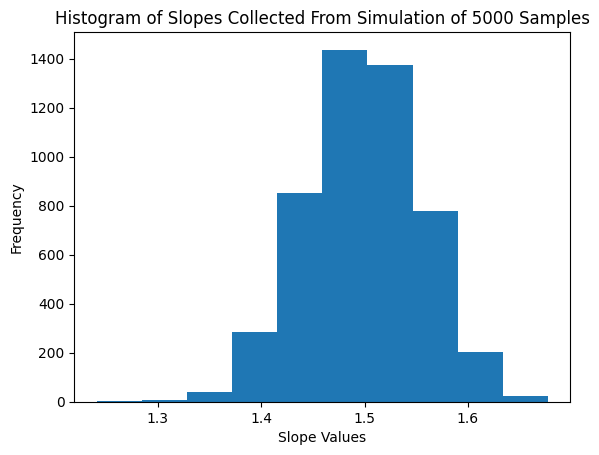

In [3]:
plt.hist(slopes)
plt.title('Histogram of Slopes Collected From Simulation of 5000 Samples')
plt.xlabel('Slope Values')
plt.ylabel('Frequency')

Use your sampling distribution to approximate the probability of observing a sample slope larger than 1.65. Give an interpretation of this value and why it might be important for us in relation to a hypothesis test.

In [4]:
len(slopes.loc[slopes > 1.65]) / len(slopes) # Finds the probability of slopes > 1.65

0.0014

We can interpret from this simulated probability of getting a slope value that is greater than 1.65. Note how this proportion (or we can use it as a probability of getting a value as extreme or more extreme of 1.65) is very low. We can use this in relation to hypothesis testing of finding a p-value (which means the probability of obtaining a value as extreme or more extreme) and typically we reject if our p-value is less than 0.05. Note in our case our simulation "p-value" is less than 0.05 so we would reject our hypothesis with statistically significant evidence that our true slope value for our data (or $\beta_1$) is greater than 1.65. So again based on our data, we would believe that our true slope value is not greater than 1.65.

Read about the database we’ll use below (part II). Give an example for each letter in the CRUD acronym in the context of this database.

- Create Data: We can do this by using our join operators later to allow us to combine different tables into one bigger table or when we are making a table of the hall of fame pitcher's batting data.
- Read Data: This is just using our `read_sql` function that will allow us to read our data in
- Update Data: This is when we might look at our aggregations of data like when we now save our data based on a statistic. For example, we did this when looking at the sum of batting statistics.
- Delete Data: We can do this by our different filtering techniques with `SELECT` in SQL. This might be finding only the Pirates managers or looking at hall of fame pitchers.

Question: What is the purpose of the `HAVING` clause when writing SQL code?

Answer: This clause says that a SQL `SELECT` statement can only return rows where aggregate values meet the specified conditions. Moreover, this means that this clause is establishing restrictions to determine which observations are displayed after they have been grouped. This is pretty similar to the `WHERE` clause if we used a `GROUP BY`.

## Part II: Querying a database

There is a database file on the assignment link called Lahman.db that is an sqlite database. This database has information on Major League Baseball.

Connect to the database and then look at all of the tables in the database (use read_sql() from pandas to have this returned as a data frame).

In [5]:
# Import sqlite3
import sqlite3

# Get database read in
con = sqlite3.connect("lahman2016.sqlite")
pd.read_sql('SELECT name FROM sqlite_schema WHERE type = "table";', con)

,name
0,AllstarFull
1,Appearances
2,AwardsManagers
3,AwardsPlayers
4,AwardsShareManagers
5,AwardsSharePlayers
6,Batting
7,BattingPost
8,CollegePlaying
9,Fielding


Write an SQL query using pd.read_sql() that returns all the teams that played in the year 2015 with all of the corresponding columns from the Teams table.

In [6]:
pd.read_sql('SELECT * FROM Teams WHERE yearID = 2015;', con)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


Write an SQL query using pd.read_sql() that returns all of the players in the hall of fame, the year
they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted
variable is important here.

In [7]:
pd.read_sql('SELECT playerID, yearid, category FROM HallOfFame;', con)

,playerID,yearid,category
0,aaronha01,1982,Player
1,abbotji01,2005,Player
2,adamsba01,1937,Player
3,adamsba01,1938,Player
4,adamsba01,1939,Player
...,...,...,...
4151,zachrpa01,1991,Player
4152,zahnge01,1991,Player
4153,zeileto01,2010,Player
4154,zimmech01,1938,Player


Write an SQL query using pd.read_sql() that return all unique managers of the Pittsburgh Pirates
(teamID of PIT) and only that information from the Managers table.

In [8]:
pd.read_sql('SELECT DISTINCT playerID FROM Managers WHERE teamID = "PIT";', con)

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01
5,bushdo01
6,callani01
7,clarkfr01
8,davissp01
9,donovpa01


Use SQL code and the HallOfFame and Managers tables to return all of the playerIDs for the people
that managed for a team that were inducted into the hall of fame. Also, programmatically report
the number of such people - this can be done in pandas after returning the data from the call to
pd.read_sql(). Please note I used distinct to show the unique player IDs that were selected so there were no repeats.

In [9]:
hof_managers = pd.read_sql('SELECT DISTINCT m.playerID FROM Managers as m LEFT JOIN HallOfFame as h ON m.playerID = h.playerID WHERE inducted = "Y";', con)
hof_managers

,playerID
0,alstowa01
1,andersp01
2,ansonca01
3,applilu01
4,bancrda01
...,...
88,willidi02
89,willite01
90,wrighge01
91,wrighha01


Here we can see all of the people (shown as unique playerIDs -- no point in showing the same person twice). We can also use a program to show the number of managers in the hall of fame which is done below.

In [10]:
len(hof_managers)

93

As we can see there are 93 different managers elected to the hall of fame.

Now use the same two tables (HallOfFame and Managers) and an SQL query to return every season
managed by each manager that made it to the hall of fame. You should return the playerID (manager
ID), G, W, and L columns from the Managers table.
Second, determine the overall win/loss records (sum of wins and sum of losses) for each of these hall of
fame managers. Third, create a new variable that is the win/loss percentage (W/(W+L)). Lastly, sort
the resulting data by the win/loss percentage variable (from largest to smallest). The last three parts
can be done in pandas with the returned data or you can do it via SQL in your call to pd.read_sql().

In [11]:
# Get the SQL query
hof_managers_seasons = pd.read_sql('SELECT m.playerID, m.G, m.W, m.L FROM Managers as m LEFT JOIN HallOfFame as h ON m.playerID = h.playerID WHERE h.inducted = "Y";', con)

# Group everything together and find sum of columns
hof_manager_records = hof_managers_seasons.groupby('playerID').sum()

# Make winning percentage column
hof_manager_records['Win_Percentage'] = hof_manager_records['W'] / (hof_manager_records['W'] + hof_manager_records["L"])

# Return table sorted by winning percentage
hof_manager_records.sort_values(by = ['Win_Percentage'], ascending = False)

,G,W,L,Win_Percentage
playerID,,,,
wrighge01,85,59,25,0.702381
spaldal01,126,78,47,0.624000
mccarjo99,3487,2125,1333,0.614517
comisch01,1410,840,541,0.608255
seleefr99,2180,1284,862,0.598322
...,...,...,...,...
wallabo01,217,62,154,0.287037
bottoji01,78,21,56,0.272727
applilu01,40,10,30,0.250000


Notice some of the managers probably made it to the Hall of Fame as a player rather than a manager.

Using SQL, construct a
table of hall of fame pitchers (any hall of famer that pitched) that gives the playerID and their total
(sum) for GS, G, W, L, IPOuts, CG, SHO, and SV columns. The summing can be done in pandas or in the
SQL call.

In [12]:
# Get the SQL query
hof_pitchers_seasons = pd.read_sql('SELECT p.playerID, p.GS, p.G, p.W, p.L, p.IPOuts, p.CG, p.SHO, p.SV FROM Pitching as p LEFT JOIN HallOfFame as h ON p.playerID = h.playerID WHERE h.inducted = "Y" GROUP BY p.playerID, p.yearID;', con)

# Group everything together and find sum of columns
hof_pitchers_pitch_stats = hof_pitchers_seasons.groupby('playerID').sum()
hof_pitchers_pitch_stats

,GS,G,W,L,IPouts,CG,SHO,SV
playerID,,,,,,,,
alexape01,583,673,364,201,15125,426,88,30
ansonca01,0,3,0,1,12,0,0,1
becklja01,1,1,0,1,12,0,0,0
bendech01,334,459,212,127,9051,255,40,34
blylebe01,647,654,270,234,13961,219,53,0
...,...,...,...,...,...,...,...,...
willivi01,471,513,249,205,11988,388,50,11
wrighge01,0,3,0,1,15,0,0,0
wrighha01,7,34,4,4,298,0,0,8


Again notice that some might have made it to the Hall of Fame by not being a pitcher by looking at some of the statistics.

For all of the hall of fame pitchers, use SQL to create a table of their batting statistics. Namely, the
playerID and their total (sum) for AB, R, H, HR, RBI, BB, and SO. The summing can be done in pandas
or in the SQL call.

In [13]:
# Get data for pitcher's HOF batting stats
hof_pitchers_batting = pd.read_sql('SELECT p.playerID, b.AB, b.R, b.H, b.HR, b.RBI, b.BB, b.SO FROM Pitching as p LEFT JOIN Batting as b ON p.playerID = b.playerID AND p.yearID = b.yearID AND p.teamID = b.teamID LEFT JOIN HallOfFame as h ON p.playerID = h.playerID WHERE h.inducted = "Y";', con)

# Get their sums of batting data
hof_pitchers_batting_stats = hof_pitchers_batting.groupby('playerID').sum()
hof_pitchers_batting_stats

,AB,R,H,HR,RBI,BB,SO
playerID,,,,,,,
alexape01,1810,154,378,11,163.0,77,276.0
ansonca01,888,178,286,21,170.0,47,22.0
becklja01,531,82,175,5,69.0,34,0.0
bendech01,1147,102,243,6,116.0,75,48.0
blylebe01,451,19,59,0,25.0,5,193.0
...,...,...,...,...,...,...,...
willivi01,1493,107,248,1,84.0,81,8.0
wrighge01,743,178,236,3,95.0,10,15.0
wrighha01,805,182,221,4,111.0,36,9.0


Using pandas join the previous two tables together by pitcher.

In [14]:
hof_pitchers_final_stats = hof_pitchers_pitch_stats.merge(hof_pitchers_batting_stats, how='left', on='playerID')

hof_pitchers_final_stats

,GS,G,W,L,IPouts,CG,SHO,SV,AB,R,H,HR,RBI,BB,SO
playerID,,,,,,,,,,,,,,,
alexape01,583,673,364,201,15125,426,88,30,1810,154,378,11,163.0,77,276.0
ansonca01,0,3,0,1,12,0,0,1,888,178,286,21,170.0,47,22.0
becklja01,1,1,0,1,12,0,0,0,531,82,175,5,69.0,34,0.0
bendech01,334,459,212,127,9051,255,40,34,1147,102,243,6,116.0,75,48.0
blylebe01,647,654,270,234,13961,219,53,0,451,19,59,0,25.0,5,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
willivi01,471,513,249,205,11988,388,50,11,1493,107,248,1,84.0,81,8.0
wrighge01,0,3,0,1,15,0,0,0,743,178,236,3,95.0,10,15.0
wrighha01,7,34,4,4,298,0,0,8,805,182,221,4,111.0,36,9.0
